In [ ]:
import pandas
import numpy as np
import json
import csv
import random

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

In [ ]:
data = []
with open("data/train.jsonl", "r") as f:
    for line in f:
        data.append(json.loads(line))

data

[{'id': 42953,
  'img': 'img/42953.png',
  'label': 0,
  'text': 'its their character not their color that matters'},
 {'id': 23058,
  'img': 'img/23058.png',
  'label': 0,
  'text': "don't be afraid to love again everyone is not like your ex"},
 {'id': 13894,
  'img': 'img/13894.png',
  'label': 0,
  'text': 'putting bows on your pet'},
 {'id': 37408,
  'img': 'img/37408.png',
  'label': 0,
  'text': 'i love everything and everybody! except for squirrels i hate squirrels'},
 {'id': 82403,
  'img': 'img/82403.png',
  'label': 0,
  'text': 'everybody loves chocolate chip cookies, even hitler'},
 {'id': 16952,
  'img': 'img/16952.png',
  'label': 0,
  'text': 'go sports! do the thing! win the points!'},
 {'id': 76932,
  'img': 'img/76932.png',
  'label': 0,
  'text': "fine you're right. now can we fucking drop it?"},
 {'id': 70914,
  'img': 'img/70914.png',
  'label': 0,
  'text': 'tattoos are bad for your health i know 5 million people that had tattoos and they all died'},
 {'id': 2973,

In [ ]:
label_1_data = [entry for entry in data if entry['label'] == 1]

# print(len(label_1_data))

path_label_data = [{'path': entry['img'], 'label': entry['label']} for entry in label_1_data]


print(path_label_data)

[{'path': 'img/79351.png', 'label': 1}, {'path': 'img/25489.png', 'label': 1}, {'path': 'img/72640.png', 'label': 1}, {'path': 'img/93547.png', 'label': 1}, {'path': 'img/74386.png', 'label': 1}, {'path': 'img/52610.png', 'label': 1}, {'path': 'img/69357.png', 'label': 1}, {'path': 'img/54602.png', 'label': 1}, {'path': 'img/20619.png', 'label': 1}, {'path': 'img/74530.png', 'label': 1}, {'path': 'img/29163.png', 'label': 1}, {'path': 'img/90583.png', 'label': 1}, {'path': 'img/52097.png', 'label': 1}, {'path': 'img/15803.png', 'label': 1}, {'path': 'img/75321.png', 'label': 1}, {'path': 'img/34791.png', 'label': 1}, {'path': 'img/34508.png', 'label': 1}, {'path': 'img/93072.png', 'label': 1}, {'path': 'img/25468.png', 'label': 1}, {'path': 'img/96578.png', 'label': 1}, {'path': 'img/78409.png', 'label': 1}, {'path': 'img/29814.png', 'label': 1}, {'path': 'img/54102.png', 'label': 1}, {'path': 'img/63710.png', 'label': 1}, {'path': 'img/14052.png', 'label': 1}, {'path': 'img/26759.png'

In [ ]:
data2 = []
with open('dataset2/train.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data2.append(row)

data2

[{'Image': 'image3476.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image5198.jpg', 'Class': 'Candle'},
 {'Image': 'image4183.jpg', 'Class': 'Snowman'},
 {'Image': 'image1806.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image7831.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image537.jpg', 'Class': 'Airplane'},
 {'Image': 'image9774.jpg', 'Class': 'Christmas_Tree'},
 {'Image': 'image5365.jpg', 'Class': 'Airplane'},
 {'Image': 'image9367.jpg', 'Class': 'Christmas_Tree'},
 {'Image': 'image4819.jpg', 'Class': 'Christmas_Tree'},
 {'Image': 'image4191.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image6764.jpg', 'Class': 'Jacket'},
 {'Image': 'image8345.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image3198.jpg', 'Class': 'Christmas_Tree'},
 {'Image': 'image7076.jpg', 'Class': 'Airplane'},
 {'Image': 'image2257.jpg', 'Class': 'Christmas_Tree'},
 {'Image': 'image7771.jpg', 'Class': 'Miscellaneous'},
 {'Image': 'image7391.jpg', 'Class': 'Snowman'},
 {'Image': 'image8473.jpg', 'Class': 'Miscellan

In [ ]:
for item in data2:
    item['path'] = 'img2/' + item['Image']
    item['label'] = 0

for entry in data2:
    del entry['Class']
    del entry['Image']
data2


[{'path': 'img2/image3476.jpg', 'label': 0},
 {'path': 'img2/image5198.jpg', 'label': 0},
 {'path': 'img2/image4183.jpg', 'label': 0},
 {'path': 'img2/image1806.jpg', 'label': 0},
 {'path': 'img2/image7831.jpg', 'label': 0},
 {'path': 'img2/image537.jpg', 'label': 0},
 {'path': 'img2/image9774.jpg', 'label': 0},
 {'path': 'img2/image5365.jpg', 'label': 0},
 {'path': 'img2/image9367.jpg', 'label': 0},
 {'path': 'img2/image4819.jpg', 'label': 0},
 {'path': 'img2/image4191.jpg', 'label': 0},
 {'path': 'img2/image6764.jpg', 'label': 0},
 {'path': 'img2/image8345.jpg', 'label': 0},
 {'path': 'img2/image3198.jpg', 'label': 0},
 {'path': 'img2/image7076.jpg', 'label': 0},
 {'path': 'img2/image2257.jpg', 'label': 0},
 {'path': 'img2/image7771.jpg', 'label': 0},
 {'path': 'img2/image7391.jpg', 'label': 0},
 {'path': 'img2/image8473.jpg', 'label': 0},
 {'path': 'img2/image4470.jpg', 'label': 0},
 {'path': 'img2/image9387.jpg', 'label': 0},
 {'path': 'img2/image9663.jpg', 'label': 0},
 {'path': '

In [ ]:
list_img = path_label_data + data2
random.shuffle(list_img)
list_img

[{'path': 'img/97521.png', 'label': 1},
 {'path': 'img2/image4984.jpg', 'label': 0},
 {'path': 'img/07523.png', 'label': 1},
 {'path': 'img2/image3480.jpg', 'label': 0},
 {'path': 'img/60214.png', 'label': 1},
 {'path': 'img2/image1194.jpg', 'label': 0},
 {'path': 'img2/image3126.jpg', 'label': 0},
 {'path': 'img2/image719.jpg', 'label': 0},
 {'path': 'img/40385.png', 'label': 1},
 {'path': 'img2/image3224.jpg', 'label': 0},
 {'path': 'img/84576.png', 'label': 1},
 {'path': 'img2/image9274.jpg', 'label': 0},
 {'path': 'img2/image5302.jpg', 'label': 0},
 {'path': 'img2/image5816.jpg', 'label': 0},
 {'path': 'img/59376.png', 'label': 1},
 {'path': 'img/72891.png', 'label': 1},
 {'path': 'img/68309.png', 'label': 1},
 {'path': 'img/16359.png', 'label': 1},
 {'path': 'img/70429.png', 'label': 1},
 {'path': 'img/02158.png', 'label': 1},
 {'path': 'img2/image83.jpg', 'label': 0},
 {'path': 'img2/image9365.jpg', 'label': 0},
 {'path': 'img2/image2717.jpg', 'label': 0},
 {'path': 'img/27058.pn

In [ ]:
len(list_img)

7956

In [ ]:
# img_size = 224
# def get_data(data_dir):
#     data = []
#     for label in labels:
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)
import torch
final =[]
X = []
Y=[]
img_size = (224,224)
for i in list_img:
    img_arr = cv2.imread(i['path'])
    img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr_rgb, img_size)
    # final.append([resized_arr ,i['label']])
    transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
    t = torch.tensor(transposed_tensor)
    X.append(t)

    Y.append(i['label'])
    # if len(resized_arr)!=224:
    #     print("jj")
    #     continue
    # print(len(resized_arr))

# final_array = np.array(final)
X_final = np.array(X)
# print(X_final,Y)
# X_final.shape

In [ ]:
X_final

array([[[[ 42,  68,  70, ...,   4,   4,   3],
         [ 84, 134, 137, ...,  10,   8,   6],
         [ 87, 138, 141, ...,   9,   5,   5],
         ...,
         [ 53,  86,  98, ...,  50,  49,  31],
         [ 54,  86,  99, ...,  48,  49,  31],
         [ 38,  61,  69, ...,  35,  33,  21]],

        [[ 44,  71,  73, ...,   7,   7,   5],
         [ 86, 138, 145, ...,  15,  14,   9],
         [ 90, 143, 147, ...,  15,  16,   9],
         ...,
         [ 65, 105, 115, ...,  41,  40,  25],
         [ 65, 105, 116, ...,  40,  39,  25],
         [ 46,  73,  81, ...,  27,  28,  18]],

        [[ 45,  73,  75, ...,   4,   6,   3],
         [ 88, 142, 148, ...,   8,   9,   7],
         [ 92, 148, 153, ...,  10,  10,   8],
         ...,
         [ 74, 120, 132, ...,  30,  28,  16],
         [ 73, 120, 133, ...,  29,  28,  16],
         [ 52,  84,  93, ...,  20,  20,  12]]],


       [[[ 64,  64,  63, ..., 115, 122, 123],
         [ 64,  64,  63, ..., 115, 122, 123],
         [ 67,  67,  65, ..., 

In [ ]:
import torch
X_tensor = torch.tensor(X_final)


In [ ]:

print(X_tensor)


tensor([[[[ 42,  68,  70,  ...,   4,   4,   3],
          [ 84, 134, 137,  ...,  10,   8,   6],
          [ 87, 138, 141,  ...,   9,   5,   5],
          ...,
          [ 53,  86,  98,  ...,  50,  49,  31],
          [ 54,  86,  99,  ...,  48,  49,  31],
          [ 38,  61,  69,  ...,  35,  33,  21]],

         [[ 44,  71,  73,  ...,   7,   7,   5],
          [ 86, 138, 145,  ...,  15,  14,   9],
          [ 90, 143, 147,  ...,  15,  16,   9],
          ...,
          [ 65, 105, 115,  ...,  41,  40,  25],
          [ 65, 105, 116,  ...,  40,  39,  25],
          [ 46,  73,  81,  ...,  27,  28,  18]],

         [[ 45,  73,  75,  ...,   4,   6,   3],
          [ 88, 142, 148,  ...,   8,   9,   7],
          [ 92, 148, 153,  ...,  10,  10,   8],
          ...,
          [ 74, 120, 132,  ...,  30,  28,  16],
          [ 73, 120, 133,  ...,  29,  28,  16],
          [ 52,  84,  93,  ...,  20,  20,  12]]],


        [[[ 64,  64,  63,  ..., 115, 122, 123],
          [ 64,  64,  63,  ..., 115

In [ ]:
import pickle
with open('/content/drive/MyDrive/tensor.pkl', 'rb') as f:
    loaded_tensor = pickle.load(f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/label.pkl', 'rb') as f:
    Y = pickle.load(f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # input channels=3, output channels=32, kernel_size=3x3
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with kernel_size=2x2, stride=2
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)  # input channels=32, output channels=32, kernel_size=3x3
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # input channels=32, output channels=64, kernel_size=3x3
        self.dropout = nn.Dropout2d(p=0.4)  # Dropout layer with dropout probability 0.4
        self.fc1 = nn.Linear(64 * 28 * 28, 128)  # Fully connected layer with input features 64*28*28 and output features 128
        self.fc2 = nn.Linear(128, 2)  # Fully connected layer with input features 128 and output features 2 (for binary classification)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply first convolutional layer followed by ReLU activation
        x = self.pool(x)  # Apply max pooling
        x = F.relu(self.conv2(x))  # Apply second convolutional layer followed by ReLU activation
        x = self.pool(x)  # Apply max pooling
        x = F.relu(self.conv3(x))  # Apply third convolutional layer followed by ReLU activation
        x = self.pool(x)  # Apply max pooling
        x = self.dropout(x)  # Apply dropout
        x = x.view(-1, 64 * 28 * 28)  # Reshape the tensor
        x = F.relu(self.fc1(x))  # Apply first fully connected layer followed by ReLU activation
        x = self.fc2(x)  # Apply second fully connected layer
        return F.softmax(x, dim=1)  # Apply softmax activation for classification

# Instantiate the model
model = Net()

# Print model summary
print(model)

import torch.optim as optim

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# Define the loss function
criterion = nn.CrossEntropyLoss()



Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F

image_tensors =loaded_tensor
print(image_tensors)
labels = torch.tensor(Y)
batch_size = 32
epochs = 5
for epoch in range(epochs):
    indices = torch.randperm(len(image_tensors))
    print(indices)
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i in range(0, len(image_tensors), batch_size):
        batch_indices = indices[i:i+batch_size]
        print(i)
        batch_images = torch.stack([image_tensors[idx] for idx in batch_indices])
        batch_labels = torch.tensor([labels[idx] for idx in batch_indices])

        optimizer.zero_grad()

        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / (len(image_tensors) / batch_size)
    train_accuracy = correct_train / total_train

    # Print progress
    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Training finished
print('Finished Training')

with open('/content/drive/MyDrive/model.pkl', 'wb') as f:
    pickle.dump(model, f)


tensor([[[[ 42.,  68.,  70.,  ...,   4.,   4.,   3.],
          [ 84., 134., 137.,  ...,  10.,   8.,   6.],
          [ 87., 138., 141.,  ...,   9.,   5.,   5.],
          ...,
          [ 53.,  86.,  98.,  ...,  50.,  49.,  31.],
          [ 54.,  86.,  99.,  ...,  48.,  49.,  31.],
          [ 38.,  61.,  69.,  ...,  35.,  33.,  21.]],

         [[ 44.,  71.,  73.,  ...,   7.,   7.,   5.],
          [ 86., 138., 145.,  ...,  15.,  14.,   9.],
          [ 90., 143., 147.,  ...,  15.,  16.,   9.],
          ...,
          [ 65., 105., 115.,  ...,  41.,  40.,  25.],
          [ 65., 105., 116.,  ...,  40.,  39.,  25.],
          [ 46.,  73.,  81.,  ...,  27.,  28.,  18.]],

         [[ 45.,  73.,  75.,  ...,   4.,   6.,   3.],
          [ 88., 142., 148.,  ...,   8.,   9.,   7.],
          [ 92., 148., 153.,  ...,  10.,  10.,   8.],
          ...,
          [ 74., 120., 132.,  ...,  30.,  28.,  16.],
          [ 73., 120., 133.,  ...,  29.,  28.,  16.],
          [ 52.,  84.,  93.,  ...

In [ ]:
with open('/content/drive/MyDrive/model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import torch
from PIL import Image
from torchvision import transforms

model_path = '/content/drive/MyDrive/model.pkl'
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

# def preprocess_image(image_path):
#     image = Image.open(image_path)
#     transform = transforms.Compose([
#         transforms.Resize((224, 224)),  # Resize the image to the size expected by the model
#         transforms.ToTensor(),           # Convert the image to a PyTorch tensor
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
#     ])
#     processed_image = transform(image)
#     processed_image = processed_image.unsqueeze(0)
#     return processed_image

def predict_image(model, processed_image):
    model.eval()
    with torch.no_grad():
        outputs = model(processed_image)
    return outputs

image_path = 'input_image.jpg'

processed_image = preprocess_image(image_path)

outputs = predict_image(loaded_model, processed_image)

print(outputs)


FileNotFoundError: [Errno 2] No such file or directory: 'trained_model.pkl'

In [18]:
img_1 = "/content/drive/MyDrive/img/blah.png"
img_2 = "/content/drive/MyDrive/img2/image1067.jpg"
img_3 = "/content/drive/MyDrive/img2/image1089.jpg"

In [19]:
import torch
img_size = (224,224)
img_arr = cv2.imread(img_3)
img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
resized_arr = cv2.resize(img_arr_rgb, img_size)
# final.append([resized_arr ,i['label']])
transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
t = torch.tensor(transposed_tensor).float()

In [20]:
import pickle
model_path = "/content/drive/MyDrive/model.pkl"
with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

In [21]:
loaded_model.eval()
with torch.no_grad():
    outputs = loaded_model(t)
print(outputs)

tensor([[9.9909e-01, 9.1104e-04]])


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1352: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [46]:
import glob

def get_images_from_folder(folder_path):
    pattern = folder_path + '/*.png'
    image_files = glob.glob(pattern)
    # img2t = folder_path + '/*.png'
    # image_files2 = glob.glob(img2t)
    # image_files.append(image_files2)
    return image_files

def get_images_from_folder2(folder_path):
    pattern = folder_path + '/*.jpg'
    image_files = glob.glob(pattern)
    # img2t = folder_path + '/*.png'
    # image_files2 = glob.glob(img2t)
    # image_files.append(image_files2)
    return image_files

folder_path1 = '/content/drive/MyDrive/train'
image_files1 = get_images_from_folder(folder_path1)

folder_path2 = '/content/drive/MyDrive/train2'
image_files2 = get_images_from_folder2(folder_path2)

In [43]:
# print(image_files1)
false_posi =0
false_neg =0
true_neg =0
true_posi =0
for i in image_files1:
  img_size = (224,224)
  # print(i)
  try:
    img_arr = cv2.imread(i)
    img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr_rgb, img_size)
    transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
    t = torch.tensor(transposed_tensor).float()
    with torch.no_grad():
      outputs = loaded_model(t)
      outputs2 = outputs.tolist()
    # print(outputs2[0])
    if outputs2[0][0]>outputs2[0][1]:
      false_neg+=1
    else:
      true_posi +=1

  except:
    continue

In [44]:
for i in image_files2:
  img_size = (224,224)
  img_arr = cv2.imread(i)
  img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  resized_arr = cv2.resize(img_arr_rgb, img_size)
  transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
  t = torch.tensor(transposed_tensor).float()
  with torch.no_grad():
    outputs = loaded_model(t)
    outputs2 = outputs.tolist()
  # print(outputs2[0])
  if outputs2[0][0]>outputs2[0][1]:
    true_neg+=1
  else:
    false_posi +=1
  print(outputs)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1352: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


tensor([[9.9998e-01, 2.0404e-05]])
tensor([[9.9987e-01, 1.3367e-04]])
tensor([[9.9999e-01, 1.3308e-05]])
tensor([[9.9963e-01, 3.7051e-04]])
tensor([[0.9968, 0.0032]])
tensor([[9.9987e-01, 1.2845e-04]])
tensor([[9.9999e-01, 1.2930e-05]])
tensor([[9.9937e-01, 6.2659e-04]])
tensor([[0.9937, 0.0063]])
tensor([[0.9675, 0.0325]])
tensor([[9.9972e-01, 2.8266e-04]])
tensor([[9.9934e-01, 6.5538e-04]])
tensor([[0.9967, 0.0033]])
tensor([[9.9950e-01, 5.0414e-04]])
tensor([[9.9974e-01, 2.5675e-04]])
tensor([[9.9979e-01, 2.1248e-04]])
tensor([[0.9533, 0.0467]])
tensor([[0.9969, 0.0031]])
tensor([[9.9998e-01, 1.8106e-05]])
tensor([[9.9990e-01, 9.4961e-05]])
tensor([[0.9954, 0.0046]])
tensor([[0.9981, 0.0019]])
tensor([[9.9932e-01, 6.7588e-04]])
tensor([[0.9485, 0.0515]])
tensor([[9.9995e-01, 4.7252e-05]])
tensor([[0.9967, 0.0033]])
tensor([[9.9957e-01, 4.3204e-04]])
tensor([[0.9790, 0.0210]])
tensor([[0.9985, 0.0015]])
tensor([[0.9963, 0.0037]])
tensor([[9.9990e-01, 1.0282e-04]])
tensor([[0.9990, 0.

In [45]:
false_posi , true_posi , false_neg , true_neg

(0, 90, 15, 100)

In [48]:
import glob

def get_images_from_folder(folder_path):
    pattern = folder_path + '/*.png'
    image_files = glob.glob(pattern)
    # img2t = folder_path + '/*.png'
    # image_files2 = glob.glob(img2t)
    # image_files.append(image_files2)
    return image_files

def get_images_from_folder2(folder_path):
    pattern = folder_path + '/*.jpg'
    image_files = glob.glob(pattern)
    # img2t = folder_path + '/*.png'
    # image_files2 = glob.glob(img2t)
    # image_files.append(image_files2)
    return image_files

folder_path1 = '/content/drive/MyDrive/Images'
image_files1 = get_images_from_folder(folder_path1)
image_files1b = get_images_from_folder2(folder_path1)


folder_path2 = '/content/drive/MyDrive/images'
image_files2 = get_images_from_folder2(folder_path2)
image_files2b = get_images_from_folder2(folder_path2)


In [49]:
false_posi =0
false_neg =0
true_neg =0
true_posi =0
for i in image_files1:
  img_size = (224,224)
  # print(i)
  try:
    img_arr = cv2.imread(i)
    img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr_rgb, img_size)
    transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
    t = torch.tensor(transposed_tensor).float()
    with torch.no_grad():
      outputs = loaded_model(t)
      outputs2 = outputs.tolist()
    # print(outputs2[0])
    if outputs2[0][0]>outputs2[0][1]:
      false_neg+=1
    else:
      true_posi +=1

  except:
    continue

for i in image_files1b:
  img_size = (224,224)
  # print(i)
  try:
    img_arr = cv2.imread(i)
    img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr_rgb, img_size)
    transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
    t = torch.tensor(transposed_tensor).float()
    with torch.no_grad():
      outputs = loaded_model(t)
      outputs2 = outputs.tolist()
    # print(outputs2[0])
    if outputs2[0][0]>outputs2[0][1]:
      false_neg+=1
    else:
      true_posi +=1

  except:
    continue

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1352: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [50]:
for i in image_files2:
  img_size = (224,224)
  img_arr = cv2.imread(i)
  img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  resized_arr = cv2.resize(img_arr_rgb, img_size)
  transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
  t = torch.tensor(transposed_tensor).float()
  with torch.no_grad():
    outputs = loaded_model(t)
    outputs2 = outputs.tolist()
  # print(outputs2[0])
  if outputs2[0][0]>outputs2[0][1]:
    true_neg+=1
  else:
    false_posi +=1
  print(outputs)

for i in image_files2b:
  img_size = (224,224)
  img_arr = cv2.imread(i)
  img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  resized_arr = cv2.resize(img_arr_rgb, img_size)
  transposed_tensor = np.transpose(resized_arr, (2, 0, 1))
  t = torch.tensor(transposed_tensor).float()
  with torch.no_grad():
    outputs = loaded_model(t)
    outputs2 = outputs.tolist()
  # print(outputs2[0])
  if outputs2[0][0]>outputs2[0][1]:
    true_neg+=1
  else:
    false_posi +=1
  print(outputs)

tensor([[1.2023e-09, 1.0000e+00]])
tensor([[1.4731e-08, 1.0000e+00]])
tensor([[4.4950e-07, 1.0000e+00]])
tensor([[0.3145, 0.6855]])
tensor([[1.4222e-12, 1.0000e+00]])
tensor([[4.1724e-13, 1.0000e+00]])
tensor([[0.1359, 0.8641]])
tensor([[0.9763, 0.0237]])
tensor([[9.9957e-01, 4.2945e-04]])
tensor([[0.9410, 0.0590]])
tensor([[2.1779e-12, 1.0000e+00]])
tensor([[4.9688e-06, 9.9999e-01]])
tensor([[0.9953, 0.0047]])
tensor([[0.9981, 0.0019]])
tensor([[0.9969, 0.0031]])
tensor([[9.5578e-12, 1.0000e+00]])
tensor([[0.9166, 0.0834]])
tensor([[0.0591, 0.9409]])
tensor([[0.9986, 0.0014]])
tensor([[1.9401e-14, 1.0000e+00]])
tensor([[0.2115, 0.7885]])
tensor([[0.9704, 0.0296]])
tensor([[3.4846e-05, 9.9997e-01]])
tensor([[4.6385e-12, 1.0000e+00]])
tensor([[3.3467e-04, 9.9967e-01]])
tensor([[0.9898, 0.0102]])
tensor([[1.8198e-05, 9.9998e-01]])
tensor([[5.1693e-07, 1.0000e+00]])
tensor([[0.9985, 0.0015]])
tensor([[9.9997e-01, 2.7638e-05]])
tensor([[2.8858e-08, 1.0000e+00]])
tensor([[9.9142e-06, 9.9999

In [53]:
accuracy = (false_neg + false_posi )/(true_neg + true_posi + false_posi + false_neg )
print(accuracy)

0.767203254908898


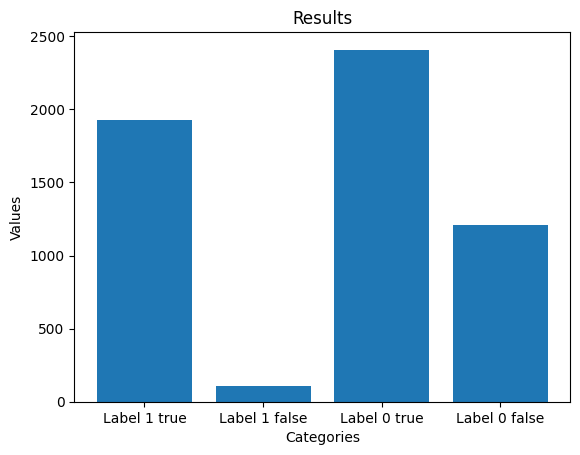

In [62]:
import matplotlib.pyplot as plt
values = [false_neg,true_posi, false_posi, true_neg]

labels = ['Label 1 true', 'Label 1 false', 'Label 0 true', 'Label 0 false']  # Optional: Labels for each value

# Plot the values as a bar graph
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Results')

# Show the plot
plt.show()

In [60]:
print(false_neg / (false_neg + true_posi))

0.9479115479115479


In [61]:
print(false_posi / (false_posi + true_neg))


0.6655610834715312


In [63]:
false_posi + true_neg , false_neg + true_posi

(3618, 2035)